In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
# convert Time notated in csv to amount of seconds.
def time_notation_to_sec(time_notation):
    # time_notation 3 variations; 00:07:30.300 or 07:30.300 07.30.300
    if isinstance(time_notation, str):
        time_notation = time_notation.replace(',', '.')
        split_string = time_notation.split(':')
        # convert string to float according to 2k time notation
        if len(split_string) > 2:   # variant like 00:07:30.300
            sec = (float(split_string[1]) * 60) +  float(split_string[2])
        elif len(split_string) == 2:   # variant like 07:30.300
            sec = (float(split_string[0]) * 60) +  float(split_string[1])
        else:       # variant like 7:30.300
            #print('3e tijd notatie variant!')
            sec = (float(time_notation[0] * 60) + float(time_notation[2:]))
    else:
        #print('deze time_notation is geen string', time_notation)
        return ''
    return sec

# Calculate watt from 500_m split in seconds.
def split_to_watt(split):
    return (split / 500) / pow(0.25, 3)

# TODO
def days_until_2k(training_date, two_k_date):
    days = 0
    return days

def min_max_2k_time(df1):
    df1['2k tijd'] = df1['2k tijd'].apply(time_notation_to_sec)
    print(f"Minimum 2k tijd is {df1['2k tijd'].min()} seconden")
    print(f"Maximum 2k tijd is {df1['2k tijd'].max()} seconden")

df1 = pd.read_csv('okeanos_processed.csv')
min_max_2k_time(df1)

KeyError: '2k tijd'

### Preprocess data and store in dictionary missing/filled entries

In [3]:
# Laat de dataset in en doe preprocessing.

cwd = os.getcwd()
csv_path = cwd+"\okeanos.csv"
raw_df = pd.read_csv(csv_path, delimiter=',', na_values=['', 'NA', 'N/A', 'NaN', 'nan'])
# store column names in col_names
col_names = raw_df.columns.tolist()

# Remove all completely empty rows or when theres only a single 2k date filled,
non_empty_df = raw_df.dropna(how='all', subset=(col_names[:-1]))
print(len(non_empty_df) / len(raw_df), '% of raw datafile is non empty rows')

# Store every colums as key in dictionary.
# Seperate missing/filled value entries in dataframe as value.
seperated_df = dict()

for col in col_names:
    filled_entries = non_empty_df.dropna(how='any', subset=[col])
    empty_entries = non_empty_df[~non_empty_df.index.isin(filled_entries.index)]
    seperated_df[col] = {'filled': filled_entries, 'empty': empty_entries}

""" Handig voor report om de data te beschrijven
report_analytics = seperated_df[KOLOM]['empty']
Kun je omschrijven of er specifieke afwijkingen zijn zoals 'machine' ineens niet meer ingevuld
"""

0.9420600858369099 % of raw datafile is non empty rows


" Handig voor report om de data te beschrijven\nreport_analytics = seperated_df[KOLOM]['empty']\nKun je omschrijven of er specifieke afwijkingen zijn zoals 'machine' ineens niet meer ingevuld\n"

In [4]:
# Select all 500m_split entries and convert to seconds and insert new column into df
col_500_split = non_empty_df.loc[:,"500_split"]
col_500_split_sec = col_500_split.apply(time_notation_to_sec)
non_empty_df.insert(9, "500_split_sec", col_500_split_sec, True)

# Select all 2k_times entries and convert to seconds and insert new column into df
two_k_split = non_empty_df.loc[:,"2k tijd"]
two_k_split_sec = two_k_split.apply(time_notation_to_sec)
non_empty_df.insert(19, "2k_tijd_sec", two_k_split_sec, True)

print(non_empty_df)

           datum  ervaring geslacht gewichtsklasse ploeg naam zone  \
0     11-09-2018       1.0        M              Z   MGH  z47   AT   
1     11-09-2018       1.0        M              Z   MGH  z47   AT   
2     11-09-2018       1.0        M              Z   MGH  z47   AT   
3     11-09-2018       1.0        M              Z   MGH  z47   AT   
4     11-09-2018       1.0        M              Z   MGH  z47   AT   
...          ...       ...      ...            ...   ...  ...  ...   
6053   23-3-2023       1.0        V              L  mgld  ld5  NaN   
6054   23-3-2023       1.0        V              L  mgld  ld1  NaN   
6055   23-3-2023       1.0        V              L  mgld  ld2  NaN   
6056   23-3-2023       1.0        V              L  mgld  ld4  NaN   
6057   23-3-2023       1.0        V              Z   mjd  d19  NaN   

     trainingype 500_split 500_split_sec  ... intervaltype interval_afstand  \
0           5x5'    1:44.6         104.6  ...         tijd              NaN   
1

### Barplot for percentage of complete/incomplete data entries per column

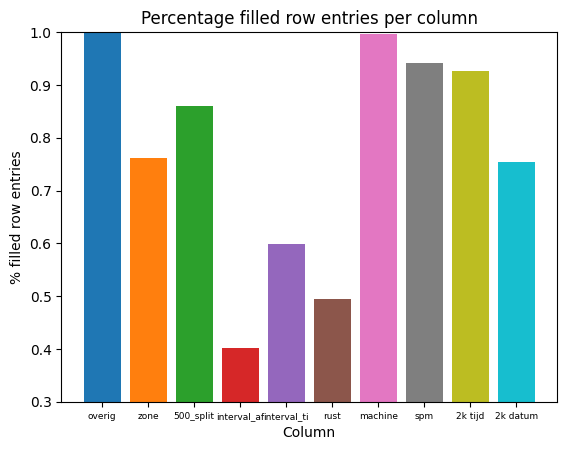

Overig = datum, ervaring, geslacht, gewichtsklasse, ploeg, naam, trainingype, aantal_intervallen, intervaltype, interval_nummer


In [6]:
# TO DO plot distribution of filled entries for every feature of the dataset.
plt.bar('overig', len(seperated_df['datum']['filled'])/len(non_empty_df))

for col in col_names:
    # All these columns are fully filled in in the dataset.
    if col not in ['datum', 'ervaring', 'geslacht', 'gewichtsklasse',
                  'ploeg', 'naam', 'trainingype', 'aantal_intervallen',
                  'intervaltype', 'interval_nummer']:
        plt.bar(str(col)[:11], len(seperated_df[col]['filled'])/len(non_empty_df))

plt.title("Percentage filled row entries per column")
plt.xlabel("Column")
plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xticks(fontsize = 6.5)
plt.ylim(0.3, 1)
plt.ylabel("% filled row entries")
plt.show()

print('Overig = datum, ervaring, geslacht, gewichtsklasse, ploeg, naam, trainingype, aantal_intervallen, intervaltype, interval_nummer' )

### Barplot, boxplot and piechart based on own selected subset of dataset below

In [8]:
# df = seperated_df[..]['filled'] merged with werk volgens mij niet.

# Specify here what dataframe you wanna use, drop missing values of column...?
test_df = non_empty_df.dropna(how='any', subset=['500_split', '2k tijd'])
df = non_empty_df

# OJML has 0 entries in the raw_data_file
#OJML = df.loc[(df['ervaring'] == 1) & (df['geslacht'] == "M") & (df['gewichtsklasse'] == "L")]
EJML = df.loc[(df['ervaring'] == 0) & (df['geslacht'] == "M") & (df['gewichtsklasse'] == "L")]
OJMZ = df.loc[(df['ervaring'] == 1) & (df['geslacht'] == "M") & (df['gewichtsklasse'] == "Z")]
EJMZ = df.loc[(df['ervaring'] == 0) & (df['geslacht'] == "M") & (df['gewichtsklasse'] == "Z")]
OJVL = df.loc[(df['ervaring'] == 1) & (df['geslacht'] == "V") & (df['gewichtsklasse'] == "L")]
# EJVL Has 1% entries in raw_data_file
EJVL = df.loc[(df['ervaring'] == 0) & (df['geslacht'] == "V") & (df['gewichtsklasse'] == "L")]
OJVZ = df.loc[(df['ervaring'] == 1) & (df['geslacht'] == "V") & (df['gewichtsklasse'] == "Z")]
EJVZ = df.loc[(df['ervaring'] == 0) & (df['geslacht'] == "V") & (df['gewichtsklasse'] == "Z")]

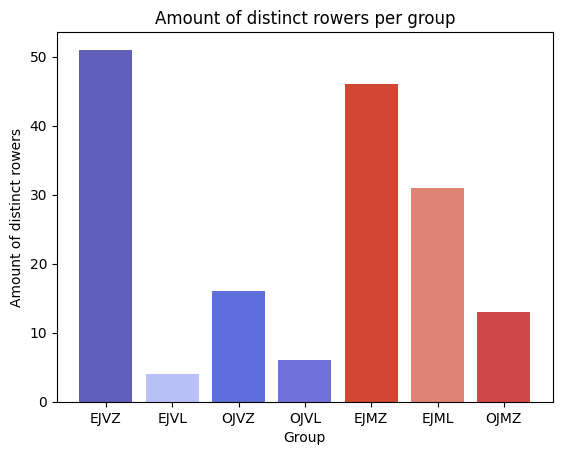

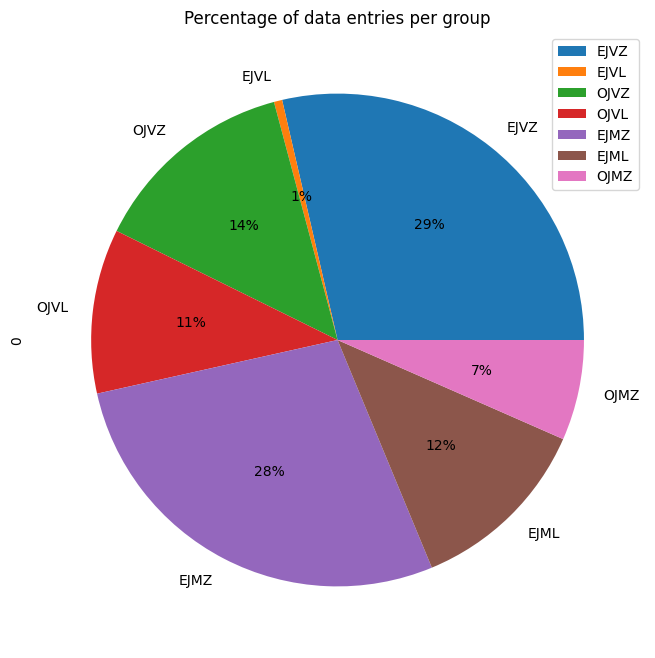

In [9]:
###  BARPLOT

i = 0
# Change the order and colours of the groups to make sense
x_labels_bar = ["EJVZ", "EJVL", "OJVZ", "OJVL", "EJMZ", "EJML", "OJMZ"]
group_colors = [(0.3, 0.3, 0.7, 0.9), (0.1, 0.2, 0.9, 0.3), (0.1, 0.2, 0.8, 0.7), (0.2, 0.2, 0.8, 0.7),
              (0.8, 0.2, 0.1, 0.9), (0.8, 0.2, 0.1, 0.6), (0.8, 0.2, 0.2, 0.9), (1, 0.3, 0.2, 1)]
amt_row_per_group = []

for group in [EJVZ, EJVL, OJVZ, OJVL, EJMZ, EJML, OJMZ]:
    # Create bars
    amt_row_entries = amt_row_per_group.append(len(group))
    plt.bar(x_labels_bar[i], len(group.naam.drop_duplicates()), color=group_colors[i])
    i+= 1

plt.title("Amount of distinct rowers per group")
plt.xlabel("Group")
plt.ylabel("Amount of distinct rowers")
plt.show()


############################
# Piechart of the total amount of entries per group
pie_chart_df =  pd.DataFrame(amt_row_per_group, index=x_labels_bar)
# make the plot
pie_chart_df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')

# show the plot
plt.title('Percentage of data entries per group')
plt.show()




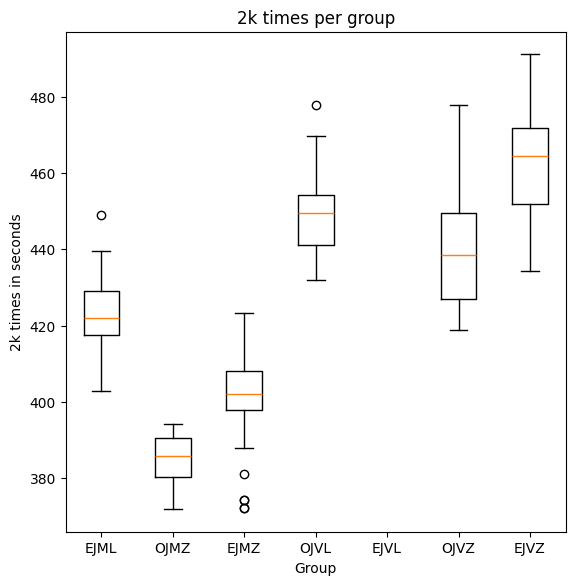

In [10]:
i = 0
# Save per group for every different name every distinct different 2k time.
x_labels_box = ["EJVZ", "EJVL", "OJVZ", "OJVL", "EJMZ", "EJML", "OJMZ"]
rower_2k_per_group = {"EJML": dict(), "OJMZ": dict(), "EJMZ": dict(),
                      "OJVL": dict(), "EJVL": dict(), "OJVZ": dict(), "EJVZ": dict()}

# Puur de hoeveelheid 2k tijden per roeier per catagorie gesommeert.
for group in [EJVZ, EJVL, OJVZ, OJVL, EJMZ, EJML, OJMZ]:
    for rower in group.naam.drop_duplicates().tolist():
        time_set = set(group.loc[group['naam'] == rower]['2k tijd'].tolist())
        float_times = []
        for time_notation in time_set:
            secs = time_notation_to_sec(time_notation)
            if secs != '':
                float_times.append(secs)
                rower_2k_per_group[x_labels_box[i]][rower] = float_times

    i+= 1

# Sum all 2k times per group
for group, rower in rower_2k_per_group.items():
    all_2k_times = []
    for rower_time in (rower_2k_per_group[group].values()):
        for seperate_2k in rower_time:
            all_2k_times.append(seperate_2k)

    rower_2k_per_group[group]['all_2ks'] = all_2k_times

boxplot_2k_data = []
boxplot_xticks = []

for k, v in rower_2k_per_group.items():
    boxplot_2k_data.append(rower_2k_per_group[k]['all_2ks'])
    boxplot_xticks.append(k)

fig = plt.figure(figsize =(5, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(boxplot_2k_data)
plt.xticks([1,2,3,4,5,6,7], boxplot_xticks)

# show plot
plt.xlabel("Group")
plt.ylabel("2k times in seconds")
plt.title("2k times per group")
plt.show()

In [11]:
# TODO
# Heatmap/correlatie met 2k
# Of een aantal_kolommen^2 heatmap
#
heatmap_df = non_empty_df.dropna(how='any', subset=['500_split', '2k tijd'])
print(heatmap_df["500_split_sec"].corr(heatmap_df["2k_tijd_sec"]))


heatmap_df2 = non_empty_df.dropna(how='any', subset=['ervaring', '2k tijd'])
print(heatmap_df2["ervaring"].corr(heatmap_df2["2k_tijd_sec"]))



#print(heatmap_df)
# Moeten numerieke waardes worden.
#      dagen tussen training en 2k
#      2k en 500 split in seconden
#heatmap_df.corr()

0.7281195198736266
0.0016160080079422139


In [11]:
testdf3 = raw_df.dropna(how='any', subset=(['500_split', 'ervaring', 'geslacht', 'gewichtsklasse', 'zone', '2k datum']))
print(testdf3)

           datum  ervaring geslacht gewichtsklasse ploeg naam zone  \
0     11-09-2018       1.0        M              Z   MGH  z47   AT   
1     11-09-2018       1.0        M              Z   MGH  z47   AT   
2     11-09-2018       1.0        M              Z   MGH  z47   AT   
3     11-09-2018       1.0        M              Z   MGH  z47   AT   
4     11-09-2018       1.0        M              Z   MGH  z47   AT   
...          ...       ...      ...            ...   ...  ...  ...   
4569  10-12-2022       0.0        V              Z   ejd  d51    I   
4570  10-12-2022       0.0        V              Z   ejd  d52    I   
4571  10-12-2022       0.0        V              Z   ejd  d53    I   
4572  10-12-2022       0.0        V              Z   ejd  d54    I   
4573  10-12-2022       0.0        V              Z   ejd  d55    I   

     trainingype 500_split aantal_intervallen intervaltype  interval_afstand  \
0           5x5'    1:44.6                  5         tijd               NaN   